In [1]:
#!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
    --------------------------------------- 2.4/124.9 MB 10.3 MB/s eta 0:00:12
   - -------------------------------------- 5.5/124.9 MB 12.9 MB/s eta 0:00:10
   -- ------------------------------------- 8.1/124.9 MB 12.0 MB/s eta 0:00:10
   ---- ----------------------------------- 14.4/124.9 MB 16.5 MB/s eta 0:00:07
   ----- ---------------------------------- 17.8/124.9 MB 16.3 MB/s eta 0:00:07
   ------ --------------------------------- 21.8/124.9 MB 16.6 MB/s eta 0:00:07
   -------- ------------------------------- 25.2/124.9 MB 16.4 MB/s eta 0:00:07
   --------- ------------------------------ 28.8/124.9 MB 16.6 MB/s eta 0:00:06
   ---------- ----------------------------- 33.0/124.9 MB 16.9 MB/s eta 0:00:06
   ----------- ---------------------------- 37.0/124.9 MB 17.1 MB/s eta 0:00:06
   ------------- -------------------------- 41.2/124.9 MB 17.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import xgboost
from xgboost import XGBRegressor

In [4]:
df=pd.read_csv('C:/Users/Mehmet Nur Kavan/Desktop/machine_learning/301/Hitters.csv')
df=df.dropna()
dms=pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"] # bağımlı değişken
x_=df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
x=pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

modle  tahmin

In [5]:
xgb = XGBRegressor().fit(x_train, y_train)

In [6]:
xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [7]:
y_pred= xgb.predict(x_test)

In [8]:
np.sqrt(mean_squared_error(y_test, y_pred))

366.3863437634965

Model Tuning

In [9]:
xgb_parms = {"learning_rate": [0.1, 0.01, 0.5], "max_depth": [2,3,4,5,8], "n_estimators":[100,200,500,1000],"colsample_bytree":[0.4, 0.7, 1]}

In [10]:
xgb_cv_model = GridSearchCV(xgb, xgb_parms, cv = 10, n_jobs = -1, verbose = 2).fit(x_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [11]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100}

In [14]:
# yukrdaki best performdaki değerleri burda giriyoruz
xgb_tuned = XGBRegressor(colsample_bytree = 0.4, learning_rate= 0.1, max_depth=5, n_estimators=100).fit(x_train, y_train)

In [15]:
y_pred = xgb_tuned.predict(x_test)

In [16]:
np.sqrt(mean_squared_error(y_test, y_pred))

345.4191388100258

degisken onem duzeyleri

In [17]:
xgb_tuned.feature_importances_*100

array([ 3.4200442 ,  1.4479895 ,  1.129698  ,  4.8879495 ,  4.7926598 ,
        3.3220198 ,  2.5662997 ,  4.8019915 , 13.776666  ,  5.916119  ,
       23.879465  , 19.626764  ,  2.6642663 ,  3.6832218 ,  0.9911506 ,
        1.076412  ,  0.28018254,  0.5746777 ,  1.1624231 ], dtype=float32)

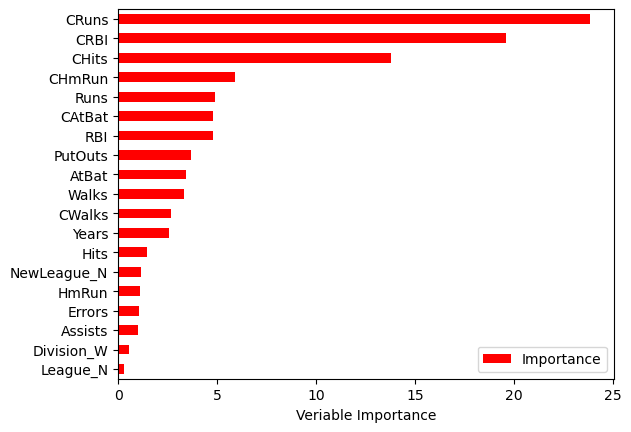

In [18]:
Importance = pd.DataFrame({'Importance': xgb_tuned.feature_importances_*100 }, index = x_train.columns)
Importance.sort_values(by = 'Importance', axis= 0, ascending = True).plot(kind= 'barh', color = 'r',)
plt.xlabel('Veriable Importance')
plt.gca().lengend_ = None